<h2>Equação de Laplace</h2>

A Equação de Laplace é uma equação diferencial parcial...


<h3>Problema</h3>
<p style="text-align: justify; text-indent:4em"> Tem-se uma superfície retangular com 10cm de comprimento (M) e 8cm de altura (N), como pode ser visto na imagem abaixo. Seus "contornos" são submetidos a potenciais diferentes, ou seja, temos quatro condições de contorno. Desse modo, deseja-se encontrar os potenciais internos da superfície, uma vez que os potenciais nas fronteiras já são conhecidos.</p> 

<img src="static/Superficie.png">



<li>
<ul>
 Essa superfície/placa (P) possui a seguinte Equação de Laplace:</ul>
<br>
\begin{equation}
    \nabla^2 u = 0
\end{equation}

\begin{equation}
    \frac {\partial^2 P}{\partial^2 x}\ + \frac {\partial^2 P}{\partial^2 y}\ = 0 
\end{equation}
</ul>
<ul>
 E possui a seguinte Equação de Poisson:
 \begin{equation}
    \nabla^2 u = x + y
 \end{equation}
 
 \begin{equation}
    \frac {\partial^2 P}{\partial^2 x}\ + \frac {\partial^2 P}{\partial^2 y}\ = x + y
\end{equation}
</ul>
</li>

<p style="text-align: justify; text-indent:4em"> Em seguida, podemos discretizar essa imagem de acordo com uma variação (delta), que chamamos de h, para encontrarmos uma equação que descreva o potencial interno na placa de acordo com a posição e possa ser resolvida iterativamente. Essa discretização é mostrada na imagem que segue.</p>

<img src="static/SuperficieDiscretizada.png">


<p style="text-align: justify; text-indent:4em">Com isso, através da discretização e da Equação de Laplace, encontramos que: </p>

\begin{equation}
    \frac {P_{ i , j+1} + P_{i , j-1} - 2P_{i , j}}{\triangle ^2 x}\ + \frac {P_{ i+1 , j} + P_{i-1 , j} - 2P_{i , j}}{\triangle ^2 y}\ = 0 
\end{equation}

\begin{equation}
    \frac {P_{ i , j+1} + P_{i , j-1} - 2P_{i , j}}{h}\ + \frac {P_{ i+1 , j} + P_{i-1 , j} - 2P_{i , j}}{h}\ = 0 
\end{equation}

\begin{equation}
  P_{i,j} = \frac {P_{ i+1 , j} + P_{i-1 , j} + P_{ i , j+1} + P_{i , j-1} }{4}
\end{equation}



In [3]:
""" Setup incial. Configuracoes que definem o problema """
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Condicoes de parada: Numero maximo de iteracoes e Erro minimo
max_interacoes = 500
erro = 0.005

# Dimensoes
dim_x = 11
dim_y = 9

# Step/delta
h = 1

# Condicoes de contor 
contorno_cima = 0
contorno_baixo = 0
contorno_direita = 100
contorno_esquerda = 100 

# "Chute" inicial dos valores desconhecidos 
chute_inicial = 0



In [5]:
# Mapa de Cor - Escala de amarelo a vermelho sequencialmente
cm = plt.cm.YlOrRd

if dim_x > dim_y: 
    dim = dim_x
else:
    dim = dim_y

# Seta um grid 2-d (duas matrizes) que representam em conjunto as coordenadas i(X) j(Y) dos pontos da placa
X, Y = np.meshgrid(np.arange(0, dim), np.arange(0, dim))

# Inicializa uma matriz para representar a placa 
placa = np.empty((dim, dim))
        
# Preenche a matriz que representa a placa com o valor do chute inicial
placa.fill(chute_inicial)

print(dim_y)
# Seta na matriz representativa as condicoes de contorno 
placa[(dim_y-1):dim_y,:dim_x] = contorno_cima
placa[:1,:dim_x] = contorno_baixo
placa[:dim_y,:1] = contorno_esquerda
placa[:dim_y,(dim_x-1):dim_x] = contorno_direita 

print("Placa inicialmente: \n\n", placa, "\n")
print("Calculando...")

diferenca = True
for rodada in range(max_interacoes):
    placa_bkp = np.copy(placa)
    diferenca = False 
    for i in range(1, (dim_y-1), h):
        for j in range(1, (dim_x-1), h):
            placa[i, j] = 0.25 * ( 
                (placa[i+1][j] + placa[i-1][j] + placa[i][j+1] + placa[i][j-1]) - 
                ((i*h + j*h) * 0 * math.pow(h,2))
                )
            if abs(placa[i, j] - placa_bkp[i, j]) > erro:
                diferenca = True

    if diferenca == False:
        break
    
        

print("\n Cálculo concluído em ", rodada, " iterações. Resultado salvo em arquio txt", placa)


9
Placa inicialmente: 

 [[ 100.    0.    0.    0.    0.    0.    0.    0.    0.    0.  100.]
 [ 100.    0.    0.    0.    0.    0.    0.    0.    0.    0.  100.]
 [ 100.    0.    0.    0.    0.    0.    0.    0.    0.    0.  100.]
 [ 100.    0.    0.    0.    0.    0.    0.    0.    0.    0.  100.]
 [ 100.    0.    0.    0.    0.    0.    0.    0.    0.    0.  100.]
 [ 100.    0.    0.    0.    0.    0.    0.    0.    0.    0.  100.]
 [ 100.    0.    0.    0.    0.    0.    0.    0.    0.    0.  100.]
 [ 100.    0.    0.    0.    0.    0.    0.    0.    0.    0.  100.]
 [ 100.    0.    0.    0.    0.    0.    0.    0.    0.    0.  100.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]] 

Calculando...

 Cálculo concluído em  58  iterações. Resultado salvo em arquio txt [[ 100.            0.            0.            0.            0.            0.
     0.            0.            0.            0.   

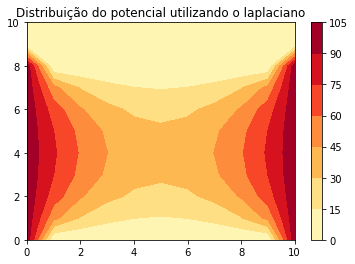

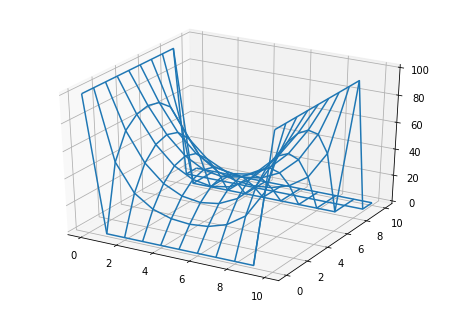

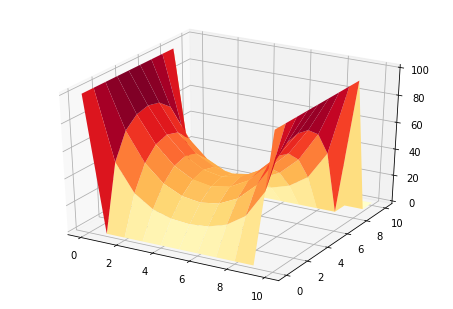

In [6]:
plt.title("Distribuição do potencial utilizando o laplaciano")
plt.contourf(X,Y, placa, cmap=plt.cm.YlOrRd)
plt.colorbar()

fig = plt.figure()
ax2 = Axes3D(fig)
if dim_x * dim_y > 1000:
    ax2.plot_wireframe(X, Y, placa, rstride=5, cstride=5)
else: 
    ax2.plot_wireframe(X, Y, placa, rstride=1, cstride=1)

fig = plt.figure()
ax1 = Axes3D(fig)
ax1.plot_surface(X, Y, placa, cmap=plt.cm.YlOrRd)


plt.show()
